In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os



In [ ]:
matplotlib.__version__

In [ ]:
conda update --all

In [ ]:
path=r'C:\Users\rjbbl\OneDrive\Desktop\achievement 6\Sepsis Analysis Feb 24 2023'

In [ ]:
df_clean = pd.read_csv(os.path.join(path,'02 Data Folder','data_clean.csv'), index_col = False)

In [ ]:
df_clean

In [ ]:
df_clean.corr()

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0.1     1552210 non-null  int64  
 1   Unnamed: 0       1552210 non-null  int64  
 2   Hour             1552210 non-null  int64  
 3   HR               1552210 non-null  float64
 4   O2Sat            1552210 non-null  float64
 5   Temp             1552210 non-null  float64
 6   SBP              1552210 non-null  float64
 7   MAP              1552210 non-null  float64
 8   DBP              1552210 non-null  float64
 9   Resp             1552210 non-null  float64
 10  BaseExcess       1552210 non-null  float64
 11  HCO3             1552210 non-null  float64
 12  FiO2             1552210 non-null  float64
 13  pH               1552210 non-null  float64
 14  PaCO2            1552210 non-null  float64
 15  SaO2             1552210 non-null  float64
 16  Lactate          1

In [ ]:
df_clean2=df_clean.drop(['Patient_ID', 'Hour','HospAdmTime'],axis=1)

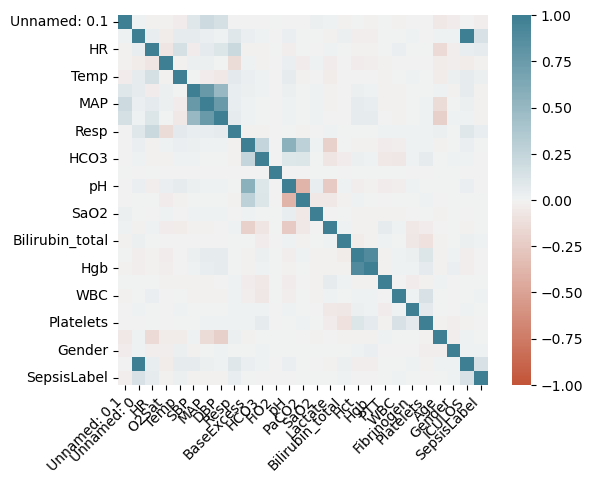

In [10]:
corr = df_clean2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


## The Heatmap:
#Greenish means positve and red means neagative with darker colors meaning a higher cirrelation magnitude. THis means that there is a very good correlation between many of the lab data results and some of the clinical indicators such as Respiratory Rate(Resp) and Hct or hematocrit. This would make sense if you are low on red blood cells it is harder to breath and you require higher amounts of FIO2 to oxygenate. Most of the darker intercepts are related clinically.YOu can see way on the right that Heart Rate and Length of Stay in ICU are very highly correlated 

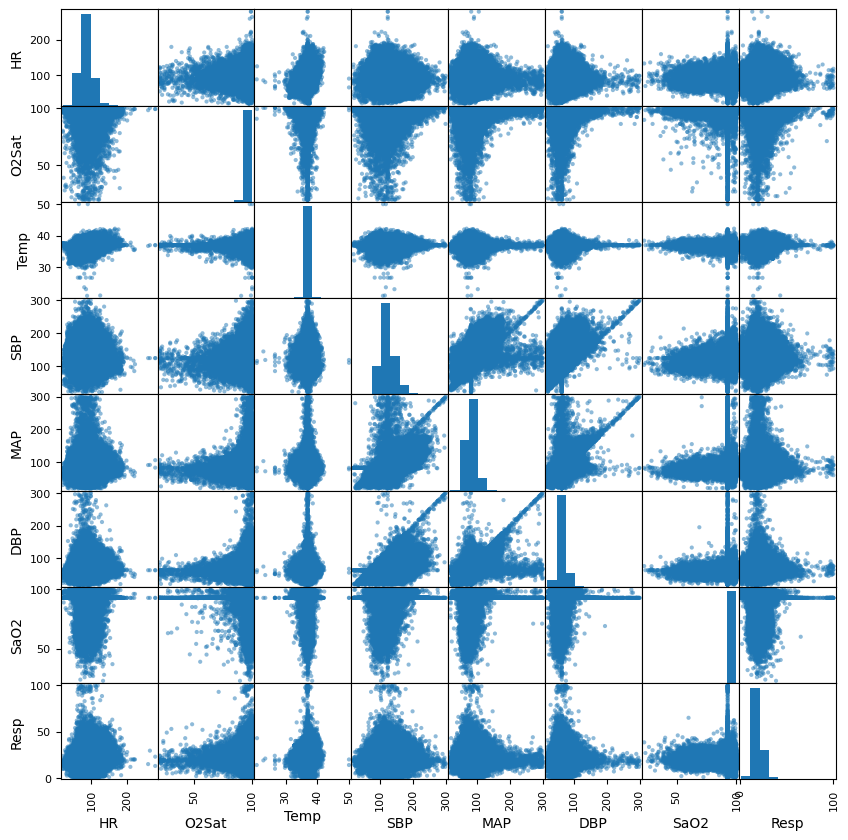

In [24]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(df_clean2[['HR','O2Sat',"Temp",'SBP','MAP','DBP','SaO2','Resp']],figsize = (10, 10))

plt.show()


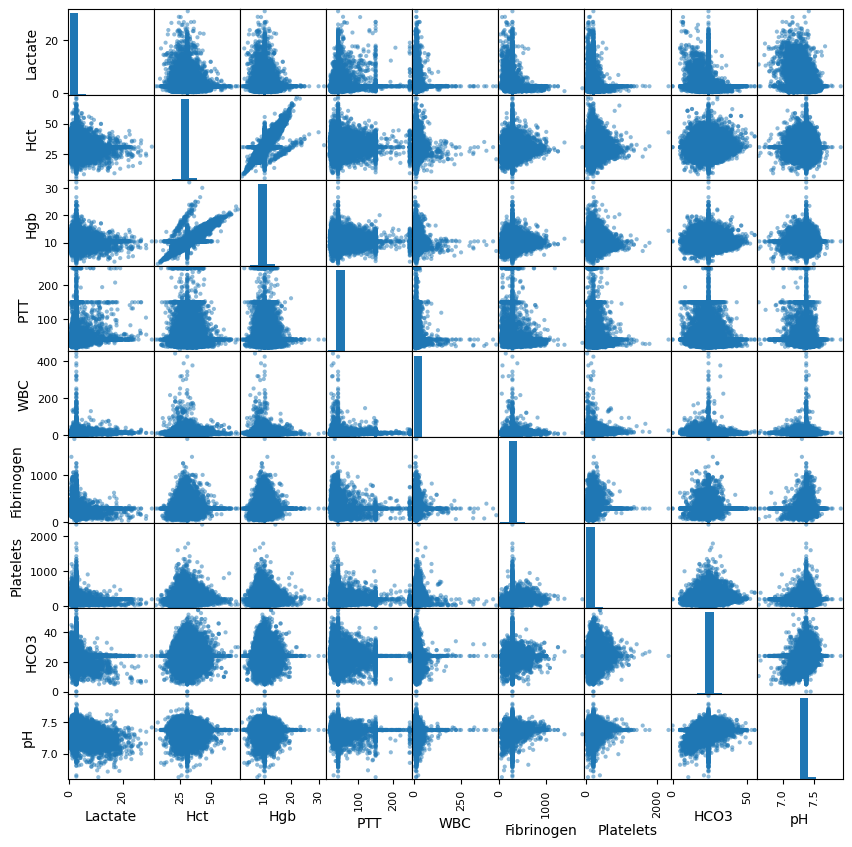

In [25]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(df_clean2[['Lactate','Hct','Hgb','PTT','WBC','Fibrinogen','Platelets','HCO3','pH']],figsize = (10, 10))

plt.show()

# Scatterplots
This was a large data set it took over 5 hours to run this even with the set split into more laboratory values versus clinical indicators. You can also see where the average replaced NAN values as it is a straight line. There were a lot of NAN but the data was collected every hour so if changes had occurred it would have been noted in the dataset leading me to beleive there was not a lot of variation in the hours that were missing. 

With the number of data points it is hard to see a true clear line for most of the data for correlation Lactate and Platelets seemed to be more clear and PTT and HgB which makes sense as they would trend together on lab values. Temp seems to be linear with HR, Sat, O2Sat for clinical values. 

A smaller or more focused plot would make this easier to read. The Heatmap was a little easier to correlate on but overall still a good visual of what is happening with the data. 


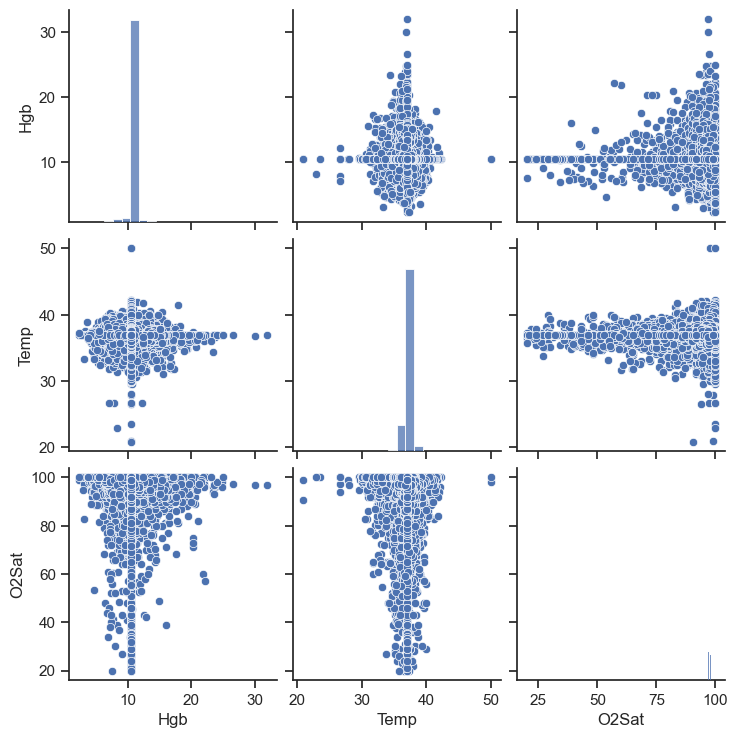

In [12]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
df_clean2 =df_clean[['Hgb', 'Temp','O2Sat']]
g = sns.pairplot(df_clean2)

import matplotlib.pyplot as plt
plt.show()

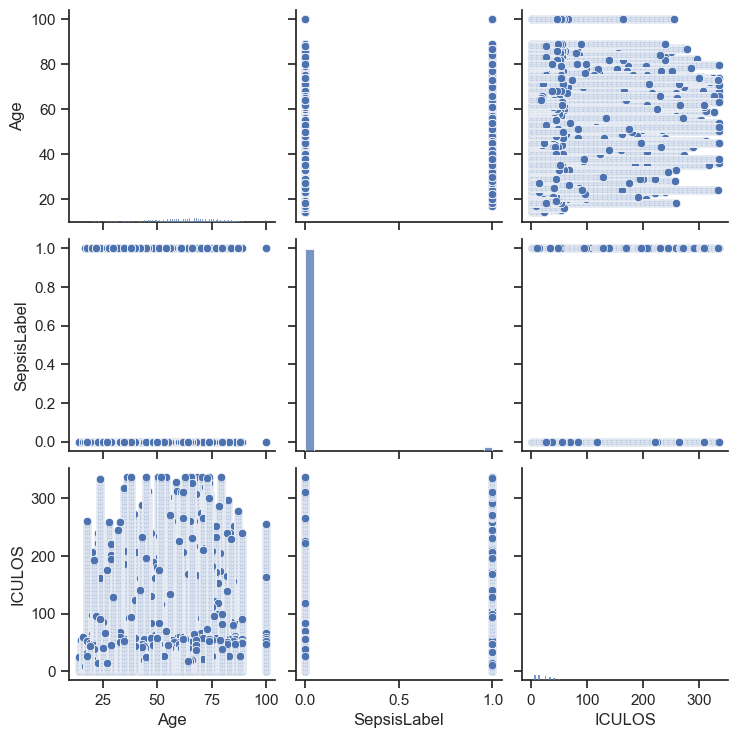

In [13]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
df_clean2 =df_clean[['Age', 'SepsisLabel','ICULOS']]
g = sns.pairplot(df_clean2)

import matplotlib.pyplot as plt
plt.show()

# Pair Plots

I took different aspects to pair them together. The top pair plot was clinical data and the second pair plot was more characteristic data of the patient. Temperature and O2Sat seem to correlate as well as Hgb and 02Sat. There were so many data points it is hard to get a clean line but they are relatively close in nature. For the characteristic data there does seem to be a correleation between Age adn Sepsis. The Sepsis Label was two values (yes they had it or no they didn't at a certain time frame) so that is why there is a line like that. The ICU length of stay wasy also dependent on age and if they had Sepsis they had a longer length of stay. 

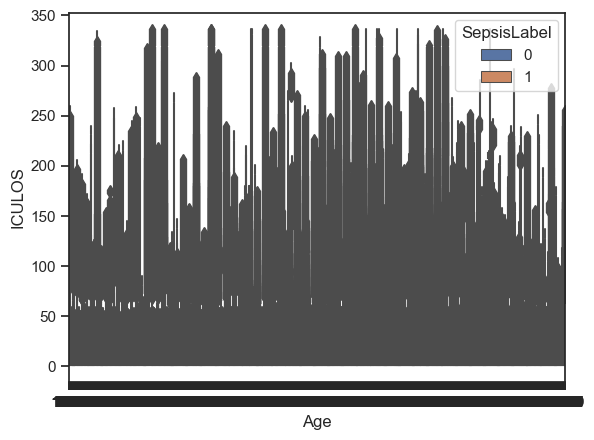

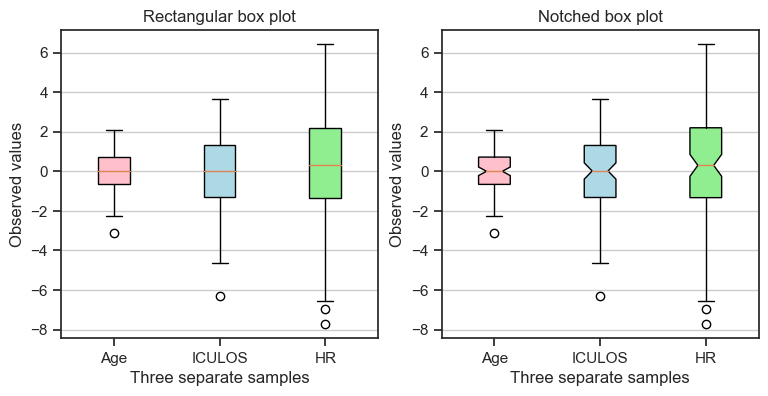

In [53]:
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = 'Age', 'ICULOS', 'HR'
sns.boxplot(x ='Age', y ='ICULOS', data = df_clean2, hue ='SepsisLabel')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(all_data,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

## Categorical Plot
this took awhile and no matter how I mapped it I would error from size unless i did the SepsisLabel as the hue which was not the most attractive but after hours of trial and compulation it was the only way I could get it to work. These do not overlap. HR seems to have the largest amount of outliers which is unsurprising because this is the clinical data entered that varied the most frequent unlike the Age and Length of stay. 

In [54]:
df_clean2.to_csv(os.path.join(path,'02 Data Folder','data_clean2.csv'))

# Final Thoughts
Investigative Questions from 6.1
1: Does Fi02 in Sepsis vary by gender?
2. Does Sepsis frequency vary by gender?
3. Does pH really indicate Sepsis ?

I do not see any correlation between Fi02 and Gender and actually need to change that to Saturation and Gender.
There is a little correlation between Sepsis and Gender it looks like from the heatmap.
There is not a very strong correlation between pH and Sepsis.

Further questions to investigate:
Is there a correlation between ICULOS and Age?
I am still thinking about my hypothesis because I would like to include Geographic components as a determinent. 